# Análise de Dados de Crédito
Para a análise, iniciaremos com uma Descritiva das variáveis de interesse presentes no Dataset. Após isso, elaboraremos modelos de previsão de bons e maus pagadores, a fim de compará-los e estudar a acurácia de cada um deles na amostra disponível. Os dados estão disponíveis no Kaggle (<a href="https://www.kaggle.com/rikdifos/credit-card-approval-prediction">acesse aqui</a>).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Verifica se o Scikit-Learn está presente no ambiente
import importlib.util
is_present = importlib.util.find_spec('sklearn')
if is_present is None:
    import pip
    pip.main(['install', 'scikit-learn'])

In [3]:
app_record = pd.read_csv('Data/application_record.csv')
app_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
cred_record = pd.read_csv('Data/credit_record.csv')
cred_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
# Categorização e Merge dos Dados: dados do Dataframe APP_RECORD não possuem a categoria de serem bons ou maus pagadores.
def categorize(row):
    if row['STATUS'] == 'C' or row['STATUS'] == 'X':
        return False
    else:
        return True

df_cred = pd.merge(app_record, cred_record, on="ID")
df_cred['BAD_PAYER'] = df_cred.apply(lambda row: categorize(row), axis=1)
df_cred.drop('MONTHS_BALANCE', axis=1, inplace=True)
df_cred_ = df_cred.groupby(df_cred['ID']).aggregate('first')

In [6]:
print(df_cred_.shape)
print(df_cred_['BAD_PAYER'].value_counts())
df_cred_.head(10)

(36457, 19)
False    27619
True      8838
Name: BAD_PAYER, dtype: int64


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,BAD_PAYER
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0,C,False
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0,C,False
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,C,False
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,True
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,X,False
5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,C,False
5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,C,False
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0,0,True
5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,None,1.0,0,True


In [7]:
def est_age(row):
    age = -1 * ( row['DAYS_BIRTH'] / 365 )
    return age
def est_empl(row):
    empl = -1 * ( row['DAYS_EMPLOYED'] / 365 )
    return empl
df_cred_['EST_AGE'] = df_cred_.apply(lambda row: est_age(row), axis = 1)
df_cred_['EST_EMPLOYMENT'] = df_cred_.apply(lambda row: est_empl(row), axis = 1)
df_cred_.loc[df_cred_['EST_EMPLOYMENT']<0, 'EST_EMPLOYMENT'] = 0

Text(0, 0.5, 'Probability of Occurrence')

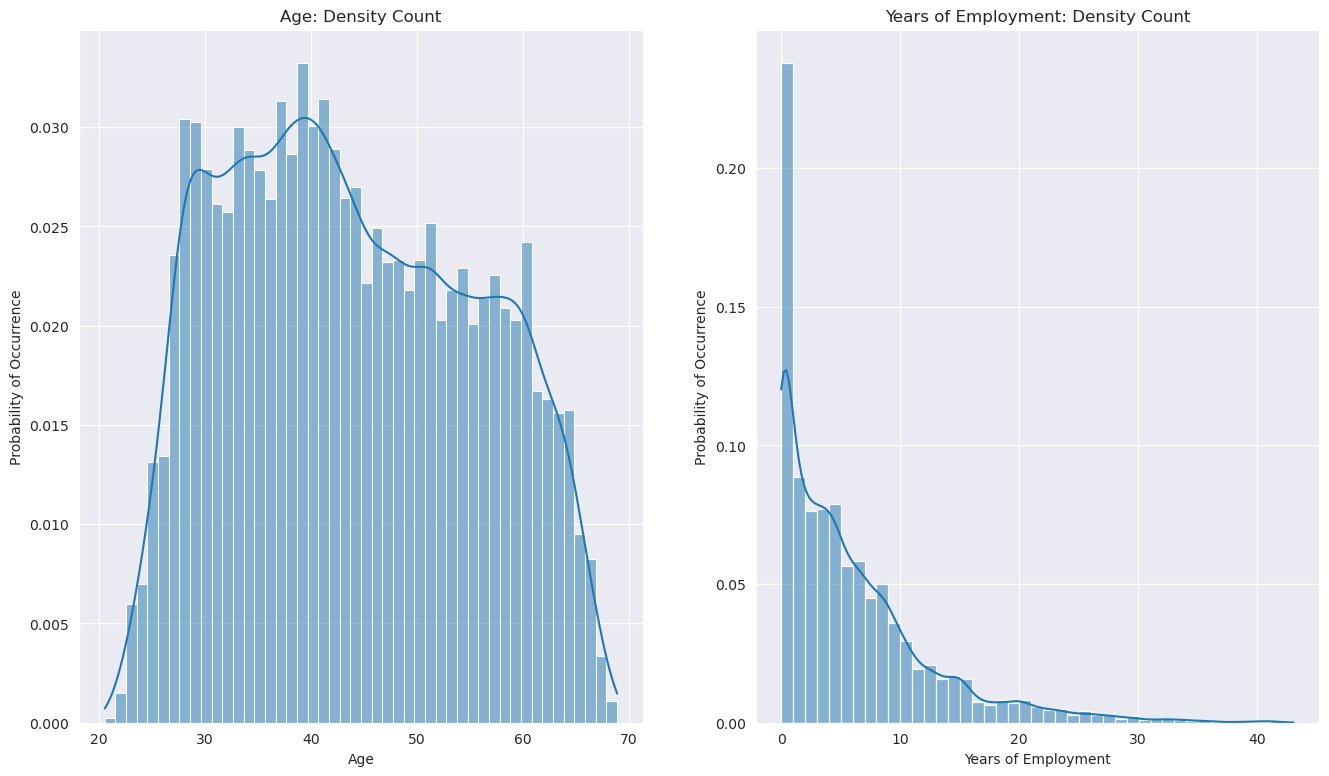

In [8]:
plt.figure(figsize=(16, 9))
plt.subplot(1,2,1)
sns.set_style("darkgrid")
sns.histplot(data=df_cred_['EST_AGE'], palette="tab1", kde=True, stat='probability', bins=int((max(df_cred_['EST_AGE']) - min(df_cred_['EST_AGE']))))
plt.title('Age: Density Count')
plt.xlabel('Age')
plt.ylabel('Probability of Occurrence')
plt.subplot(1,2,2)
sns.set_style("darkgrid")
sns.histplot(data=df_cred_['EST_EMPLOYMENT'], palette="tab1", kde=True, stat='probability', bins=int((max(df_cred_['EST_EMPLOYMENT']) - min(df_cred_['EST_EMPLOYMENT']))))
plt.title('Years of Employment: Density Count')
plt.xlabel('Years of Employment')
plt.ylabel('Probability of Occurrence')

In [9]:
df_model = df_cred_.drop(['STATUS', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1)

In [20]:
# Testar Relação entre número de filhos e variável resposta
dataset = df_model[['CNT_CHILDREN', 'BAD_PAYER']]
matrix = pd.crosstab(dataset['BAD_PAYER'], dataset['CNT_CHILDREN'], margins=True)
matrix.drop('All', inplace=True)
matrix.drop('All', inplace=True, axis=1)
print(matrix)

CNT_CHILDREN      0     1     2    3   4   5  7  14  19
BAD_PAYER                                              
False         19046  5729  2475  307  44  16  2   0   0
True           6155  1763   781  112  19   4  0   3   1


In [30]:
import scipy.stats as stats
import numpy as np
chisq = stats.chi2_contingency(matrix, correction=False)[0]
n = matrix.sum()
n = n.sum()
mindim = min(dataset.shape) - 1
cramer_v = np.sqrt((chisq/n) / mindim)
print(f'O resultado calculado da estatística Cramer V é de {cramer_v:.5f}')

O resultado calculado da estatística Cramer V é de 0.02257


In [11]:
from sklearn.model_selection import train_test_split

x = df_cred_.drop("BAD_PAYER", axis=1)
y = df_cred_["BAD_PAYER"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
hyperparams = {'n_neighbors': np.arange(1,25)}
knn_gscv = GridSearchCV(knn, hyperparams, cv=5)
knn_gscv.fit(xtrain, ytrain)
knn_prob = KNeighborsClassifier.predict_proba()

ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 407, in _fit
    X, y = self._validate_data(
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'M'

--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 407, in _fit
    X, y = self._validate_data(
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/home/thomaschiari/miniconda3/envs/cdados_on/lib/python3.9/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'F'
